# 손동작 분류 경진대회 베이스라인
이번 대회는 주어진 센서 데이터를 통해 손동작을 분류하는 경진대회입니다. 

언뜻보면 간단해 보이지만 처음 데이터 분석을 접하시는 분들에게는 어디부터 어떻게 시작해야 하는지 막막하실 겁니다.

# 누구나 할 수 있는 데이터 분석
딥러닝, 머신러닝, 모델, 학습, 회귀분석 .... 다 몰라도 괜찮습니다!

누구나 할 수 있는 방식으로 간단하게 데이터 분석 & 예측을 진행해보겠습니다.

# 데이터 불러오기
먼저 분석하려는 데이터를 작업장으로 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를 편하게 다루도록 해주는 라이브러리입니다.

데이터 분석에는 반드시 사용된다고 해도 과언이 아닌 라이브러리이니, 시간이 날때마다 공부해둡시다.

In [1]:
import pandas as pd 

# 코랩 드라이브를 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

# csv 형식으로 된 데이터 파일을 읽어옵니다. 
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실전캐글/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실전캐글/test.csv')

# 데이터의 최상단 5줄을 표시합니다. 
train.head()

Mounted at /content/drive


,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


출력된 데이터의 모양을 살펴보면 총 34개의 열(column)이 존재하는 것을 확인할 수 있습니다.

데이터를 자세히 살펴보는 것은 EDA 글을 통해 더 자세히 배워봅시다.

여기에서는 분석 방법에 초점을 맞추겠습니다.

# 결측치 확인
결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [2]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


결측치 처리

이번 데이터에는 결측치가 존재하지 않습니다. 

# EDA

In [3]:
# target 분포 확인  -> 4 classes
train['target'].value_counts()

3    599
2    593
1    574
0    569
Name: target, dtype: int64

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2335.0,1168.000000,674.200761,1.000000,584.500000,1168.000000,1751.500000,2335.000000
sensor_1,2335.0,-1.122174,11.486353,-94.746969,-4.036597,-0.951398,2.895540,68.876142
sensor_2,2335.0,-1.024673,7.399859,-63.942094,-4.031957,-1.015582,2.140456,39.913391
sensor_3,2335.0,-0.672769,26.519159,-122.195138,-14.878500,-0.961088,13.974075,127.124171
sensor_4,2335.0,-0.147724,15.551500,-111.870691,-7.116633,-0.890469,6.110973,102.015561
sensor_5,2335.0,-0.327494,11.461970,-94.147972,-3.968687,-0.871690,2.970387,89.059852
sensor_6,2335.0,-0.423462,7.314322,-70.916786,-3.957699,-0.804810,3.006144,34.923040
sensor_7,2335.0,0.676275,26.869479,-105.956553,-13.937806,0.058910,13.934438,120.046277
sensor_8,2335.0,-0.936019,15.598104,-102.965354,-8.053214,-1.095551,4.955494,125.160611
sensor_9,2335.0,-0.797432,12.015022,-81.268085,-4.031148,-0.944613,2.235557,74.101715


# 데이터 분리

학습 데이터에서 target 데이터를 분리합니다.

In [ ]:
# train_X = train.drop(['id','target'],axis=1)
# train_y = train.target

In [15]:
# train vs validation
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train, test_size=0.1, shuffle = True, random_state = 9502)

In [16]:
train_X = train_data.drop(['id', 'target'], axis=1)
train_y = train_data.target

val_X = val_data.drop(['id', 'target'], axis=1)
val_y = val_data.target

In [17]:
test_X = test.drop(['id'],axis=1)

# 데이터 스케일링

In [18]:
# 스케일링에 사용할 min, max 값 저장
mins = train_X.min()
maxs = train_X.max()

# 데이터 확인하기
mins[:5]

sensor_1    -94.746969
sensor_2    -63.942094
sensor_3   -122.195138
sensor_4   -111.870691
sensor_5    -94.147972
dtype: float64

In [19]:
train_X = (train_X - mins) / (maxs - mins)
val_X = (val_X - mins) / (maxs - mins)
test_X = (test_X - mins) / (maxs - mins)
train_X.describe().T[['min', 'max']]
# train_X.describe().T

,min,max
sensor_1,0.0,1.0
sensor_2,0.0,1.0
sensor_3,0.0,1.0
sensor_4,0.0,1.0
sensor_5,0.0,1.0
sensor_6,0.0,1.0
sensor_7,0.0,1.0
sensor_8,0.0,1.0
sensor_9,0.0,1.0
sensor_10,0.0,1.0


# DataLoader 만들기

## dataframe -> numpy -> tensor -> dataset -> dataloader

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


import random
random.seed(42)
torch.manual_seed(42)

In [21]:
# dataframe -> torch로 변경
import numpy as np

train_X = torch.from_numpy(np.array(train_X)).float()
train_y = torch.tensor(train_y.values)

val_X = torch.from_numpy(np.array(val_X)).float()
val_y = torch.from_numpy(val_y.values)

test_X = torch.from_numpy(np.array(test_X)).float() 

In [22]:
print(val_X.shape)
print(val_y.shape)

print(train_X.shape)
print(train_y.shape)

torch.Size([234, 32])
torch.Size([234])
torch.Size([2101, 32])
torch.Size([2101])


In [23]:
# torch로 되어있는 값들 -> dataset으로 변경

train_dataset = TensorDataset(train_X, train_y)
val_dataset = TensorDataset(val_X, val_y)
test_dataset = TensorDataset(test_X)

In [24]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, drop_last = True)

In [25]:
for batch_idx, samples in enumerate(train_dataloader):
    if batch_idx > 0:
        break
    print(samples[0].shape)
    print(samples[1])

torch.Size([16, 32])
tensor([1, 2, 2, 2, 1, 0, 2, 3, 0, 2, 3, 0, 1, 3, 2, 3])


# GPU 지정

In [26]:
import os
print("number of GPUs:", torch.cuda.device_count())
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
use_cuda = torch.cuda.is_available()
print("Does GPU exist? : ", use_cuda)
DEVICE = torch.device("cuda" if use_cuda else "cpu")

number of GPUs: 1
Does GPU exist? :  True


In [27]:
DEVICE

device(type='cuda')

# MODEL

In [28]:
class Models(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 4),
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

model = Models().to(DEVICE)

print(model)

Models(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=128, out_features=4, bias=True)
  )
)


# Early Stopper

In [29]:
import numpy as np
class LossEarlyStopper():
  def __init__ (self, patience:int) -> None:
    self.patience = patience
    self.patience_counter = 0
    self.min_loss = np.Inf
    self.stop = False
    self.save_model = False
  def check_early_stopping(self, loss:float) -> None:
    
    if self.min_loss == np.Inf:
      self.min_loss = loss
      return None

    elif loss > self.min_loss:
      self.patience_counter += 1
      msg = f"Early stopping counter {self.patience_counter} / {self.patience}"
      if self.patience_counter == self.patience:
        self.stop = True
    
    elif loss <= self.min_loss:
      self.patience_counter = 0
      self.save_model = True
      msg = f"validation loss decreased {self.min_loss} -> {loss}"
    
    print(msg)

# 숨김

In [ ]:
# args = {
#     "result_dir": "/content/drive/MyDrive/Colab Notebooks/실전캐글/",
#     "num_classes": 4,
#     "train_epochs": 30,
#     "adam_epsilon": 1e-8,
#     "seed": 42,
#     "train_batch_size": 16,
#     "eval_batch_size": 16,
#     "learning_rate": 1e-6,
#     "run": "demo1_adamW",
#     "patience": 10
# }

In [ ]:
# args['train_epochs']

30

In [ ]:
# from torch import nn

# class net(nn.Module):
#     def __init__(self):
#         super(net, self).__init__()
#         self.network = nn.Sequential(
#             nn.Linear(32, 16),
#             nn.BatchNorm1d(16),
#             nn.ELU(),

#             nn.Linear(16, 8),
#             nn.BatchNorm1d(8),
#             nn.ELU(),
#             nn.Dropout(0.3),
    
#             nn.Linear(8, 8),
#             nn.BatchNorm1d(8),
#             nn.ELU(),
#             nn.Dropout(0.3),

#             nn.Linear(8, 4)
#         )

#     def forward(self, x):
#         logits = self.network(x)
#         return logits

# 학습

In [30]:
from torch.optim import Adam, AdamW
from torch.utils import *
from tqdm import tqdm


seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


def train(model, train_data, val_data, mode = 'train'):

  early_stopper = LossEarlyStopper(10)
  train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, drop_last=True)
  val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=16, drop_last=True)

  if True:
    # 데이터 로더가 성공적으로 로드 되었a는지 확인
    for idx, data in enumerate(train_dataloader):
      if idx == 0:
        print("batch size:", len(data[0]))
        print("The firsh batch looks like .. \n", data[0])

  criterion = nn.CrossEntropyLoss()
  total_step = len(train_dataloader) *  30 # args.train_epochs
  # print("criterion, total_step")

  optimizer = AdamW(model.parameters(), lr = 0.001, eps=1e-8)
  # print("optimizer")
  if use_cuda:
    model = model.to(DEVICE)
    criterion = criterion.to(DEVICE)
    #print("cuda ok")


  tr_loss = 0.0
  val_loss = 0.0
  best_score =0.0
  best_loss =np.inf

  
  for epoch_num in range(100): #args.train_epochs
    total_acc_train = 0
    total_loss_train = 0
    acc =0

    assert mode in ['train', 'val'], 'your mode should be either \'train\' or \'val\''
    # print("mode ok")
    
    if mode == 'train':
      for train_input, train_label in tqdm(train_dataloader):
          train_input = train_input.to(DEVICE)
          # print(train_input.shape)
          train_label = train_label.to(DEVICE)
          # print(train_label)

          output = model(train_input)
          batch_loss = criterion(output, train_label)
          total_loss_train += batch_loss.item()


          # one-hot
          #acc = (torch.argmax(output, dim=1) == torch.argmax(train_label, dim=1)).sum().item()
          _, predictions = torch.max(output, 1)

          for label, prediction in zip(train_label, predictions):
              if label == prediction:
                  acc = acc + 1
          total_acc_train += acc
          acc = 0

          optimizer.zero_grad()

          batch_loss.backward()
          optimizer.step()

      total_acc_val = 0
      total_loss_val =0


    model.eval()
    with torch.no_grad():
      for val_input, val_label in val_dataloader:
        val_input = val_input.to(DEVICE)
        val_label = val_label.to(DEVICE)
        
        output = model(val_input)
        batch_loss = criterion(output, val_label)
        total_loss_val += batch_loss.item()


        _, predictions = torch.max(output, 1)

        for label, prediction in zip(val_label, predictions):
            if label == prediction:
                acc = acc + 1
        total_acc_val += acc
        acc = 0

        # one-hot
        # acc = (torch.argmax(output, dim=1) == torch.argmax(val_label, dim=1)).sum().item()
        # total_acc_val += acc
  


    train_loss = total_loss_train / len(train_data)
    train_accuracy = total_acc_train / len(train_data)
    val_loss = total_loss_val / len(val_data)
    val_accuracy = total_acc_val / len(val_data)

    print(f'Epoch: {epoch_num + 1} \
                | Train Loss: {train_loss: .3f} \
                | Train Accuracy: {train_accuracy: .3f} \
                | Val Loss: {val_loss: .3f} \
                | Val Accuracy: {val_accuracy: .3f}')

    early_stopper.check_early_stopping(loss=val_loss)
    if early_stopper.stop:
                print('Early stopped, Best score : ', best_score)
                break

    if val_loss < best_loss :
            # 모델이 개선됨 -> 검증 점수와 베스트 loss, weight 갱신
                best_score = val_accuracy 
                
                ### v2에서 추가
                best_loss =val_loss
                # 학습된 모델을 저장할 디렉토리 및 모델 이름 지정
                SAVED_MODEL =  os.path.join('/content/drive/MyDrive/Colab Notebooks/실전캐글/', f'test.pt')
            
                check_point = {
                    'model': model.state_dict(),
                    'optimizer': optimizer.state_dict(),
                }
                torch.save(check_point, SAVED_MODEL) 
    
  print("train finished")    





In [33]:
train(model, train_dataset, val_dataset, mode = 'train')

batch size: 16
The firsh batch looks like .. 
 tensor([[0.5683, 0.5960, 0.4370, 0.4956, 0.5028, 0.6423, 0.5174, 0.4559, 0.5742,
         0.5058, 0.5140, 0.4980, 0.5075, 0.6087, 0.4517, 0.4995, 0.5278, 0.6696,
         0.3924, 0.4670, 0.4927, 0.6231, 0.5761, 0.5047, 0.6238, 0.6000, 0.3600,
         0.5184, 0.5581, 0.6368, 0.4742, 0.5110],
        [0.4702, 0.6064, 0.5071, 0.4995, 0.4647, 0.6428, 0.5620, 0.3946, 0.2840,
         0.4628, 0.3912, 0.4534, 0.6952, 0.5180, 0.5230, 0.5244, 0.0546, 0.7490,
         0.3569, 0.4330, 0.5992, 0.6145, 0.6098, 0.4695, 0.6875, 0.5383, 0.3424,
         0.5619, 0.3096, 0.6830, 0.3805, 0.5014],
        [0.5547, 0.5871, 0.3656, 0.5234, 0.4759, 0.6137, 0.3975, 0.4255, 0.4925,
         0.4721, 0.4506, 0.4035, 0.5248, 0.5466, 0.2980, 0.5649, 0.5390, 0.7000,
         0.6561, 0.4317, 0.6035, 0.5060, 0.4197, 0.5215, 0.6942, 0.6214, 0.5823,
         0.4413, 0.5505, 0.6834, 0.5423, 0.5367],
        [0.5486, 0.5755, 0.5872, 0.5226, 0.5150, 0.6321, 0.3141, 0.4037, 0

100%|██████████| 131/131 [00:00<00:00, 172.53it/s]


Epoch: 1                 | Train Loss:  0.082                 | Train Accuracy:  0.363                 | Val Loss:  0.071                 | Val Accuracy:  0.474


100%|██████████| 131/131 [00:00<00:00, 373.76it/s]


Epoch: 2                 | Train Loss:  0.079                 | Train Accuracy:  0.418                 | Val Loss:  0.074                 | Val Accuracy:  0.436
Early stopping counter 1 / 10


100%|██████████| 131/131 [00:00<00:00, 361.93it/s]


Epoch: 3                 | Train Loss:  0.075                 | Train Accuracy:  0.460                 | Val Loss:  0.070                 | Val Accuracy:  0.474
validation loss decreased 0.07107290803876698 -> 0.06988280553084153


100%|██████████| 131/131 [00:00<00:00, 359.11it/s]


Epoch: 4                 | Train Loss:  0.071                 | Train Accuracy:  0.495                 | Val Loss:  0.067                 | Val Accuracy:  0.427
validation loss decreased 0.07107290803876698 -> 0.06734315732605436


100%|██████████| 131/131 [00:00<00:00, 367.44it/s]


Epoch: 5                 | Train Loss:  0.068                 | Train Accuracy:  0.541                 | Val Loss:  0.069                 | Val Accuracy:  0.449
validation loss decreased 0.07107290803876698 -> 0.06877173572523981


100%|██████████| 131/131 [00:00<00:00, 360.49it/s]


Epoch: 6                 | Train Loss:  0.063                 | Train Accuracy:  0.579                 | Val Loss:  0.061                 | Val Accuracy:  0.538
validation loss decreased 0.07107290803876698 -> 0.06146535124534216


100%|██████████| 131/131 [00:00<00:00, 367.92it/s]


Epoch: 7                 | Train Loss:  0.057                 | Train Accuracy:  0.617                 | Val Loss:  0.059                 | Val Accuracy:  0.560
validation loss decreased 0.07107290803876698 -> 0.05903423087209718


100%|██████████| 131/131 [00:00<00:00, 377.16it/s]


Epoch: 8                 | Train Loss:  0.057                 | Train Accuracy:  0.613                 | Val Loss:  0.062                 | Val Accuracy:  0.521
validation loss decreased 0.07107290803876698 -> 0.0623582283146361


100%|██████████| 131/131 [00:00<00:00, 357.29it/s]


Epoch: 9                 | Train Loss:  0.052                 | Train Accuracy:  0.657                 | Val Loss:  0.054                 | Val Accuracy:  0.581
validation loss decreased 0.07107290803876698 -> 0.0538398152233189


100%|██████████| 131/131 [00:00<00:00, 360.69it/s]


Epoch: 10                 | Train Loss:  0.052                 | Train Accuracy:  0.661                 | Val Loss:  0.064                 | Val Accuracy:  0.526
validation loss decreased 0.07107290803876698 -> 0.06365491488041022


100%|██████████| 131/131 [00:00<00:00, 367.03it/s]


Epoch: 11                 | Train Loss:  0.053                 | Train Accuracy:  0.661                 | Val Loss:  0.055                 | Val Accuracy:  0.594
validation loss decreased 0.07107290803876698 -> 0.05470089881848066


100%|██████████| 131/131 [00:00<00:00, 367.13it/s]


Epoch: 12                 | Train Loss:  0.049                 | Train Accuracy:  0.691                 | Val Loss:  0.051                 | Val Accuracy:  0.641
validation loss decreased 0.07107290803876698 -> 0.05098527746322828


100%|██████████| 131/131 [00:00<00:00, 372.03it/s]


Epoch: 13                 | Train Loss:  0.047                 | Train Accuracy:  0.686                 | Val Loss:  0.050                 | Val Accuracy:  0.615
validation loss decreased 0.07107290803876698 -> 0.049612258871396385


100%|██████████| 131/131 [00:00<00:00, 349.94it/s]


Epoch: 14                 | Train Loss:  0.042                 | Train Accuracy:  0.750                 | Val Loss:  0.052                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.05178196690021417


100%|██████████| 131/131 [00:00<00:00, 358.99it/s]


Epoch: 15                 | Train Loss:  0.044                 | Train Accuracy:  0.718                 | Val Loss:  0.050                 | Val Accuracy:  0.620
validation loss decreased 0.07107290803876698 -> 0.05017942088282006


100%|██████████| 131/131 [00:00<00:00, 361.71it/s]


Epoch: 16                 | Train Loss:  0.041                 | Train Accuracy:  0.740                 | Val Loss:  0.050                 | Val Accuracy:  0.611
validation loss decreased 0.07107290803876698 -> 0.0504601432217492


100%|██████████| 131/131 [00:00<00:00, 362.85it/s]


Epoch: 17                 | Train Loss:  0.043                 | Train Accuracy:  0.736                 | Val Loss:  0.050                 | Val Accuracy:  0.607
validation loss decreased 0.07107290803876698 -> 0.05026971338651119


100%|██████████| 131/131 [00:00<00:00, 363.51it/s]


Epoch: 18                 | Train Loss:  0.043                 | Train Accuracy:  0.716                 | Val Loss:  0.053                 | Val Accuracy:  0.581
validation loss decreased 0.07107290803876698 -> 0.05299828220636417


100%|██████████| 131/131 [00:00<00:00, 351.63it/s]


Epoch: 19                 | Train Loss:  0.042                 | Train Accuracy:  0.743                 | Val Loss:  0.056                 | Val Accuracy:  0.607
validation loss decreased 0.07107290803876698 -> 0.05593066847222483


100%|██████████| 131/131 [00:00<00:00, 369.59it/s]


Epoch: 20                 | Train Loss:  0.041                 | Train Accuracy:  0.749                 | Val Loss:  0.047                 | Val Accuracy:  0.624
validation loss decreased 0.07107290803876698 -> 0.04736161550395509


100%|██████████| 131/131 [00:00<00:00, 372.71it/s]


Epoch: 21                 | Train Loss:  0.039                 | Train Accuracy:  0.748                 | Val Loss:  0.052                 | Val Accuracy:  0.611
validation loss decreased 0.07107290803876698 -> 0.05245054685152494


100%|██████████| 131/131 [00:00<00:00, 360.40it/s]


Epoch: 22                 | Train Loss:  0.041                 | Train Accuracy:  0.735                 | Val Loss:  0.046                 | Val Accuracy:  0.645
validation loss decreased 0.07107290803876698 -> 0.04631613500607319


100%|██████████| 131/131 [00:00<00:00, 372.49it/s]


Epoch: 23                 | Train Loss:  0.036                 | Train Accuracy:  0.768                 | Val Loss:  0.051                 | Val Accuracy:  0.645
validation loss decreased 0.07107290803876698 -> 0.0510776753608997


100%|██████████| 131/131 [00:00<00:00, 373.34it/s]


Epoch: 24                 | Train Loss:  0.037                 | Train Accuracy:  0.763                 | Val Loss:  0.050                 | Val Accuracy:  0.650
validation loss decreased 0.07107290803876698 -> 0.049952034384776384


100%|██████████| 131/131 [00:00<00:00, 347.16it/s]


Epoch: 25                 | Train Loss:  0.037                 | Train Accuracy:  0.767                 | Val Loss:  0.049                 | Val Accuracy:  0.662
validation loss decreased 0.07107290803876698 -> 0.04930689192225791


100%|██████████| 131/131 [00:00<00:00, 360.09it/s]


Epoch: 26                 | Train Loss:  0.036                 | Train Accuracy:  0.776                 | Val Loss:  0.047                 | Val Accuracy:  0.684
validation loss decreased 0.07107290803876698 -> 0.04650751813354655


100%|██████████| 131/131 [00:00<00:00, 351.68it/s]


Epoch: 27                 | Train Loss:  0.036                 | Train Accuracy:  0.766                 | Val Loss:  0.047                 | Val Accuracy:  0.662
validation loss decreased 0.07107290803876698 -> 0.04736266546269767


100%|██████████| 131/131 [00:00<00:00, 364.24it/s]


Epoch: 28                 | Train Loss:  0.034                 | Train Accuracy:  0.787                 | Val Loss:  0.063                 | Val Accuracy:  0.573
validation loss decreased 0.07107290803876698 -> 0.06300240653192896


100%|██████████| 131/131 [00:00<00:00, 354.23it/s]


Epoch: 29                 | Train Loss:  0.034                 | Train Accuracy:  0.782                 | Val Loss:  0.044                 | Val Accuracy:  0.645
validation loss decreased 0.07107290803876698 -> 0.04436700084270575


100%|██████████| 131/131 [00:00<00:00, 363.52it/s]


Epoch: 30                 | Train Loss:  0.033                 | Train Accuracy:  0.795                 | Val Loss:  0.044                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.04443557726012336


100%|██████████| 131/131 [00:00<00:00, 367.07it/s]


Epoch: 31                 | Train Loss:  0.033                 | Train Accuracy:  0.789                 | Val Loss:  0.045                 | Val Accuracy:  0.658
validation loss decreased 0.07107290803876698 -> 0.045458416908215254


100%|██████████| 131/131 [00:00<00:00, 351.63it/s]


Epoch: 32                 | Train Loss:  0.033                 | Train Accuracy:  0.795                 | Val Loss:  0.047                 | Val Accuracy:  0.675
validation loss decreased 0.07107290803876698 -> 0.04709978401660919


100%|██████████| 131/131 [00:00<00:00, 366.91it/s]


Epoch: 33                 | Train Loss:  0.032                 | Train Accuracy:  0.792                 | Val Loss:  0.048                 | Val Accuracy:  0.645
validation loss decreased 0.07107290803876698 -> 0.048066853712766595


100%|██████████| 131/131 [00:00<00:00, 360.57it/s]


Epoch: 34                 | Train Loss:  0.032                 | Train Accuracy:  0.808                 | Val Loss:  0.048                 | Val Accuracy:  0.679
validation loss decreased 0.07107290803876698 -> 0.04778408252785348


100%|██████████| 131/131 [00:00<00:00, 359.62it/s]


Epoch: 35                 | Train Loss:  0.033                 | Train Accuracy:  0.805                 | Val Loss:  0.051                 | Val Accuracy:  0.662
validation loss decreased 0.07107290803876698 -> 0.05060437678271889


100%|██████████| 131/131 [00:00<00:00, 365.41it/s]


Epoch: 36                 | Train Loss:  0.033                 | Train Accuracy:  0.798                 | Val Loss:  0.050                 | Val Accuracy:  0.650
validation loss decreased 0.07107290803876698 -> 0.049810129735204905


100%|██████████| 131/131 [00:00<00:00, 362.56it/s]


Epoch: 37                 | Train Loss:  0.033                 | Train Accuracy:  0.799                 | Val Loss:  0.048                 | Val Accuracy:  0.675
validation loss decreased 0.07107290803876698 -> 0.04842123427452185


100%|██████████| 131/131 [00:00<00:00, 362.16it/s]


Epoch: 38                 | Train Loss:  0.031                 | Train Accuracy:  0.809                 | Val Loss:  0.042                 | Val Accuracy:  0.697
validation loss decreased 0.07107290803876698 -> 0.042290377820658885


100%|██████████| 131/131 [00:00<00:00, 364.31it/s]


Epoch: 39                 | Train Loss:  0.029                 | Train Accuracy:  0.821                 | Val Loss:  0.045                 | Val Accuracy:  0.722
validation loss decreased 0.07107290803876698 -> 0.04472934078966451


100%|██████████| 131/131 [00:00<00:00, 345.24it/s]


Epoch: 40                 | Train Loss:  0.028                 | Train Accuracy:  0.830                 | Val Loss:  0.059                 | Val Accuracy:  0.603
validation loss decreased 0.07107290803876698 -> 0.05933435350401789


100%|██████████| 131/131 [00:00<00:00, 360.01it/s]


Epoch: 41                 | Train Loss:  0.028                 | Train Accuracy:  0.822                 | Val Loss:  0.042                 | Val Accuracy:  0.726
validation loss decreased 0.07107290803876698 -> 0.04214582267480019


100%|██████████| 131/131 [00:00<00:00, 366.46it/s]


Epoch: 42                 | Train Loss:  0.028                 | Train Accuracy:  0.826                 | Val Loss:  0.041                 | Val Accuracy:  0.701
validation loss decreased 0.07107290803876698 -> 0.041275962168334894


100%|██████████| 131/131 [00:00<00:00, 355.15it/s]


Epoch: 43                 | Train Loss:  0.027                 | Train Accuracy:  0.830                 | Val Loss:  0.053                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.05320343400678064


100%|██████████| 131/131 [00:00<00:00, 366.34it/s]


Epoch: 44                 | Train Loss:  0.029                 | Train Accuracy:  0.812                 | Val Loss:  0.044                 | Val Accuracy:  0.701
validation loss decreased 0.07107290803876698 -> 0.0436784135352852


100%|██████████| 131/131 [00:00<00:00, 354.76it/s]


Epoch: 45                 | Train Loss:  0.027                 | Train Accuracy:  0.834                 | Val Loss:  0.042                 | Val Accuracy:  0.701
validation loss decreased 0.07107290803876698 -> 0.04154523481161167


100%|██████████| 131/131 [00:00<00:00, 362.82it/s]


Epoch: 46                 | Train Loss:  0.026                 | Train Accuracy:  0.837                 | Val Loss:  0.049                 | Val Accuracy:  0.692
validation loss decreased 0.07107290803876698 -> 0.04876307875682146


100%|██████████| 131/131 [00:00<00:00, 368.14it/s]


Epoch: 47                 | Train Loss:  0.028                 | Train Accuracy:  0.822                 | Val Loss:  0.042                 | Val Accuracy:  0.714
validation loss decreased 0.07107290803876698 -> 0.04177699346318204


100%|██████████| 131/131 [00:00<00:00, 366.17it/s]


Epoch: 48                 | Train Loss:  0.027                 | Train Accuracy:  0.823                 | Val Loss:  0.049                 | Val Accuracy:  0.692
validation loss decreased 0.07107290803876698 -> 0.049276651098177984


100%|██████████| 131/131 [00:00<00:00, 361.19it/s]


Epoch: 49                 | Train Loss:  0.026                 | Train Accuracy:  0.840                 | Val Loss:  0.052                 | Val Accuracy:  0.650
validation loss decreased 0.07107290803876698 -> 0.05193053338772211


100%|██████████| 131/131 [00:00<00:00, 369.24it/s]


Epoch: 50                 | Train Loss:  0.025                 | Train Accuracy:  0.849                 | Val Loss:  0.045                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.04507772739116962


100%|██████████| 131/131 [00:00<00:00, 348.75it/s]


Epoch: 51                 | Train Loss:  0.024                 | Train Accuracy:  0.854                 | Val Loss:  0.052                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.052272144036415294


100%|██████████| 131/131 [00:00<00:00, 371.90it/s]


Epoch: 52                 | Train Loss:  0.025                 | Train Accuracy:  0.839                 | Val Loss:  0.046                 | Val Accuracy:  0.726
validation loss decreased 0.07107290803876698 -> 0.04569481765357857


100%|██████████| 131/131 [00:00<00:00, 342.54it/s]


Epoch: 53                 | Train Loss:  0.024                 | Train Accuracy:  0.845                 | Val Loss:  0.042                 | Val Accuracy:  0.714
validation loss decreased 0.07107290803876698 -> 0.04207070706746517


100%|██████████| 131/131 [00:00<00:00, 367.80it/s]


Epoch: 54                 | Train Loss:  0.022                 | Train Accuracy:  0.862                 | Val Loss:  0.046                 | Val Accuracy:  0.701
validation loss decreased 0.07107290803876698 -> 0.04573860624407092


100%|██████████| 131/131 [00:00<00:00, 357.95it/s]


Epoch: 55                 | Train Loss:  0.022                 | Train Accuracy:  0.861                 | Val Loss:  0.042                 | Val Accuracy:  0.709
validation loss decreased 0.07107290803876698 -> 0.04248601007155883


100%|██████████| 131/131 [00:00<00:00, 356.54it/s]


Epoch: 56                 | Train Loss:  0.022                 | Train Accuracy:  0.866                 | Val Loss:  0.045                 | Val Accuracy:  0.701
validation loss decreased 0.07107290803876698 -> 0.04481768964702248


100%|██████████| 131/131 [00:00<00:00, 366.20it/s]


Epoch: 57                 | Train Loss:  0.024                 | Train Accuracy:  0.858                 | Val Loss:  0.045                 | Val Accuracy:  0.731
validation loss decreased 0.07107290803876698 -> 0.04497287747187492


100%|██████████| 131/131 [00:00<00:00, 344.40it/s]


Epoch: 58                 | Train Loss:  0.027                 | Train Accuracy:  0.836                 | Val Loss:  0.046                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.04574207197397183


100%|██████████| 131/131 [00:00<00:00, 360.27it/s]


Epoch: 59                 | Train Loss:  0.023                 | Train Accuracy:  0.854                 | Val Loss:  0.048                 | Val Accuracy:  0.722
validation loss decreased 0.07107290803876698 -> 0.04830039782911284


100%|██████████| 131/131 [00:00<00:00, 363.43it/s]


Epoch: 60                 | Train Loss:  0.024                 | Train Accuracy:  0.848                 | Val Loss:  0.041                 | Val Accuracy:  0.748
validation loss decreased 0.07107290803876698 -> 0.0411737000840342


100%|██████████| 131/131 [00:00<00:00, 350.74it/s]


Epoch: 61                 | Train Loss:  0.023                 | Train Accuracy:  0.864                 | Val Loss:  0.058                 | Val Accuracy:  0.662
validation loss decreased 0.07107290803876698 -> 0.05821447341870039


100%|██████████| 131/131 [00:00<00:00, 353.04it/s]


Epoch: 62                 | Train Loss:  0.022                 | Train Accuracy:  0.867                 | Val Loss:  0.044                 | Val Accuracy:  0.714
validation loss decreased 0.07107290803876698 -> 0.043560093794113554


100%|██████████| 131/131 [00:00<00:00, 359.64it/s]


Epoch: 63                 | Train Loss:  0.021                 | Train Accuracy:  0.871                 | Val Loss:  0.042                 | Val Accuracy:  0.756
validation loss decreased 0.07107290803876698 -> 0.041860111630879916


100%|██████████| 131/131 [00:00<00:00, 346.51it/s]


Epoch: 64                 | Train Loss:  0.025                 | Train Accuracy:  0.842                 | Val Loss:  0.045                 | Val Accuracy:  0.688
validation loss decreased 0.07107290803876698 -> 0.0445061324753313


100%|██████████| 131/131 [00:00<00:00, 353.82it/s]


Epoch: 65                 | Train Loss:  0.020                 | Train Accuracy:  0.873                 | Val Loss:  0.046                 | Val Accuracy:  0.692
validation loss decreased 0.07107290803876698 -> 0.04621156209554428


100%|██████████| 131/131 [00:00<00:00, 296.51it/s]


Epoch: 66                 | Train Loss:  0.021                 | Train Accuracy:  0.863                 | Val Loss:  0.045                 | Val Accuracy:  0.714
validation loss decreased 0.07107290803876698 -> 0.04529669046656698


100%|██████████| 131/131 [00:00<00:00, 218.70it/s]


Epoch: 67                 | Train Loss:  0.021                 | Train Accuracy:  0.867                 | Val Loss:  0.047                 | Val Accuracy:  0.709
validation loss decreased 0.07107290803876698 -> 0.04677657490102654


100%|██████████| 131/131 [00:00<00:00, 186.85it/s]


Epoch: 68                 | Train Loss:  0.023                 | Train Accuracy:  0.855                 | Val Loss:  0.053                 | Val Accuracy:  0.645
validation loss decreased 0.07107290803876698 -> 0.052890889919721164


100%|██████████| 131/131 [00:00<00:00, 345.51it/s]


Epoch: 69                 | Train Loss:  0.023                 | Train Accuracy:  0.858                 | Val Loss:  0.052                 | Val Accuracy:  0.692
validation loss decreased 0.07107290803876698 -> 0.052320898852796636


100%|██████████| 131/131 [00:00<00:00, 183.82it/s]


Epoch: 70                 | Train Loss:  0.020                 | Train Accuracy:  0.874                 | Val Loss:  0.047                 | Val Accuracy:  0.701
validation loss decreased 0.07107290803876698 -> 0.04700627642819005


100%|██████████| 131/131 [00:00<00:00, 351.21it/s]


Epoch: 71                 | Train Loss:  0.018                 | Train Accuracy:  0.888                 | Val Loss:  0.046                 | Val Accuracy:  0.714
validation loss decreased 0.07107290803876698 -> 0.046155218512584


100%|██████████| 131/131 [00:00<00:00, 373.47it/s]


Epoch: 72                 | Train Loss:  0.021                 | Train Accuracy:  0.863                 | Val Loss:  0.055                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.054891261025371715


100%|██████████| 131/131 [00:00<00:00, 366.92it/s]


Epoch: 73                 | Train Loss:  0.021                 | Train Accuracy:  0.864                 | Val Loss:  0.050                 | Val Accuracy:  0.705
validation loss decreased 0.07107290803876698 -> 0.04951862710663396


100%|██████████| 131/131 [00:00<00:00, 354.81it/s]


Epoch: 74                 | Train Loss:  0.020                 | Train Accuracy:  0.880                 | Val Loss:  0.043                 | Val Accuracy:  0.718
validation loss decreased 0.07107290803876698 -> 0.043385154034337424


100%|██████████| 131/131 [00:00<00:00, 345.48it/s]


Epoch: 75                 | Train Loss:  0.020                 | Train Accuracy:  0.876                 | Val Loss:  0.046                 | Val Accuracy:  0.735
validation loss decreased 0.07107290803876698 -> 0.04566729361684913


100%|██████████| 131/131 [00:00<00:00, 360.23it/s]


Epoch: 76                 | Train Loss:  0.018                 | Train Accuracy:  0.889                 | Val Loss:  0.051                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.050712220625490204


100%|██████████| 131/131 [00:00<00:00, 218.04it/s]


Epoch: 77                 | Train Loss:  0.018                 | Train Accuracy:  0.886                 | Val Loss:  0.045                 | Val Accuracy:  0.709
validation loss decreased 0.07107290803876698 -> 0.04520435185513945


100%|██████████| 131/131 [00:00<00:00, 269.29it/s]


Epoch: 78                 | Train Loss:  0.017                 | Train Accuracy:  0.890                 | Val Loss:  0.048                 | Val Accuracy:  0.692
validation loss decreased 0.07107290803876698 -> 0.04837198440845196


100%|██████████| 131/131 [00:00<00:00, 360.91it/s]


Epoch: 79                 | Train Loss:  0.023                 | Train Accuracy:  0.855                 | Val Loss:  0.043                 | Val Accuracy:  0.739
validation loss decreased 0.07107290803876698 -> 0.043486648995397434


100%|██████████| 131/131 [00:00<00:00, 362.21it/s]


Epoch: 80                 | Train Loss:  0.018                 | Train Accuracy:  0.894                 | Val Loss:  0.055                 | Val Accuracy:  0.731
validation loss decreased 0.07107290803876698 -> 0.055230819516711764


100%|██████████| 131/131 [00:00<00:00, 353.12it/s]


Epoch: 81                 | Train Loss:  0.017                 | Train Accuracy:  0.890                 | Val Loss:  0.058                 | Val Accuracy:  0.650
validation loss decreased 0.07107290803876698 -> 0.05811282075368441


100%|██████████| 131/131 [00:00<00:00, 361.34it/s]


Epoch: 82                 | Train Loss:  0.021                 | Train Accuracy:  0.866                 | Val Loss:  0.046                 | Val Accuracy:  0.705
validation loss decreased 0.07107290803876698 -> 0.046477453576193914


100%|██████████| 131/131 [00:00<00:00, 350.53it/s]


Epoch: 83                 | Train Loss:  0.015                 | Train Accuracy:  0.906                 | Val Loss:  0.053                 | Val Accuracy:  0.650
validation loss decreased 0.07107290803876698 -> 0.05346816510726244


100%|██████████| 131/131 [00:00<00:00, 360.96it/s]


Epoch: 84                 | Train Loss:  0.021                 | Train Accuracy:  0.868                 | Val Loss:  0.054                 | Val Accuracy:  0.697
validation loss decreased 0.07107290803876698 -> 0.05411441038306962


100%|██████████| 131/131 [00:00<00:00, 366.13it/s]


Epoch: 85                 | Train Loss:  0.019                 | Train Accuracy:  0.881                 | Val Loss:  0.055                 | Val Accuracy:  0.658
validation loss decreased 0.07107290803876698 -> 0.05540042007580782


100%|██████████| 131/131 [00:00<00:00, 356.20it/s]


Epoch: 86                 | Train Loss:  0.018                 | Train Accuracy:  0.886                 | Val Loss:  0.046                 | Val Accuracy:  0.705
validation loss decreased 0.07107290803876698 -> 0.04626257437416631


100%|██████████| 131/131 [00:00<00:00, 362.02it/s]


Epoch: 87                 | Train Loss:  0.017                 | Train Accuracy:  0.895                 | Val Loss:  0.052                 | Val Accuracy:  0.705
validation loss decreased 0.07107290803876698 -> 0.052032284788851045


100%|██████████| 131/131 [00:00<00:00, 350.61it/s]


Epoch: 88                 | Train Loss:  0.016                 | Train Accuracy:  0.895                 | Val Loss:  0.054                 | Val Accuracy:  0.671
validation loss decreased 0.07107290803876698 -> 0.05439364196907761


100%|██████████| 131/131 [00:00<00:00, 361.60it/s]


Epoch: 89                 | Train Loss:  0.018                 | Train Accuracy:  0.892                 | Val Loss:  0.045                 | Val Accuracy:  0.701
validation loss decreased 0.07107290803876698 -> 0.04495342317809407


100%|██████████| 131/131 [00:00<00:00, 370.16it/s]


Epoch: 90                 | Train Loss:  0.020                 | Train Accuracy:  0.874                 | Val Loss:  0.054                 | Val Accuracy:  0.662
validation loss decreased 0.07107290803876698 -> 0.05360346484897483


100%|██████████| 131/131 [00:00<00:00, 358.93it/s]


Epoch: 91                 | Train Loss:  0.019                 | Train Accuracy:  0.876                 | Val Loss:  0.051                 | Val Accuracy:  0.709
validation loss decreased 0.07107290803876698 -> 0.05120284861733771


100%|██████████| 131/131 [00:00<00:00, 357.28it/s]


Epoch: 92                 | Train Loss:  0.019                 | Train Accuracy:  0.879                 | Val Loss:  0.048                 | Val Accuracy:  0.714
validation loss decreased 0.07107290803876698 -> 0.04758219497326093


100%|██████████| 131/131 [00:00<00:00, 357.29it/s]


Epoch: 93                 | Train Loss:  0.016                 | Train Accuracy:  0.897                 | Val Loss:  0.047                 | Val Accuracy:  0.697
validation loss decreased 0.07107290803876698 -> 0.046638078414476834


100%|██████████| 131/131 [00:00<00:00, 363.03it/s]


Epoch: 94                 | Train Loss:  0.019                 | Train Accuracy:  0.883                 | Val Loss:  0.053                 | Val Accuracy:  0.705
validation loss decreased 0.07107290803876698 -> 0.05302484206154815


100%|██████████| 131/131 [00:00<00:00, 359.04it/s]


Epoch: 95                 | Train Loss:  0.018                 | Train Accuracy:  0.885                 | Val Loss:  0.049                 | Val Accuracy:  0.692
validation loss decreased 0.07107290803876698 -> 0.04850108463030595


100%|██████████| 131/131 [00:00<00:00, 356.42it/s]


Epoch: 96                 | Train Loss:  0.016                 | Train Accuracy:  0.901                 | Val Loss:  0.055                 | Val Accuracy:  0.679
validation loss decreased 0.07107290803876698 -> 0.054916533649477184


100%|██████████| 131/131 [00:00<00:00, 360.80it/s]


Epoch: 97                 | Train Loss:  0.018                 | Train Accuracy:  0.891                 | Val Loss:  0.047                 | Val Accuracy:  0.756
validation loss decreased 0.07107290803876698 -> 0.046561933799177155


100%|██████████| 131/131 [00:00<00:00, 363.74it/s]


Epoch: 98                 | Train Loss:  0.015                 | Train Accuracy:  0.908                 | Val Loss:  0.049                 | Val Accuracy:  0.726
validation loss decreased 0.07107290803876698 -> 0.049196535196059786


100%|██████████| 131/131 [00:00<00:00, 357.53it/s]


Epoch: 99                 | Train Loss:  0.016                 | Train Accuracy:  0.901                 | Val Loss:  0.053                 | Val Accuracy:  0.692
validation loss decreased 0.07107290803876698 -> 0.0533649262964216


100%|██████████| 131/131 [00:00<00:00, 347.06it/s]

Epoch: 100                 | Train Loss:  0.018                 | Train Accuracy:  0.886                 | Val Loss:  0.050                 | Val Accuracy:  0.714
validation loss decreased 0.07107290803876698 -> 0.05048945062180869
train finished


# RandomForest

참고 링크 : https://blog.naver.com/spiderman25/222487722993

RandomForest 란 DecisionTree 모델의 오버피팅 문제를 해결하기 위해 고안된 아이디어

결정 트리(DecisionTree)의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것임

​랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음임

랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초함

​잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있음

​이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어드는 것이 수학적으로 증명되었음

​이런 전략을 구현하려면 결정 트리를 많이 만들어야 함

각각의 트리는 타깃 예측을 잘 해야 하고 다른 트리와는 구별되어야 함

랜덤 포레스트는 트리들이 달라지도록 트리 생성 시 무작위성을 주입함

랜덤 포레스트에서 트리를 랜덤하게 만드는 방법은 두 가지임

첫번째, 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법

두번째, 분할 테스트에서 특성을 무작위로 선택하는 방법

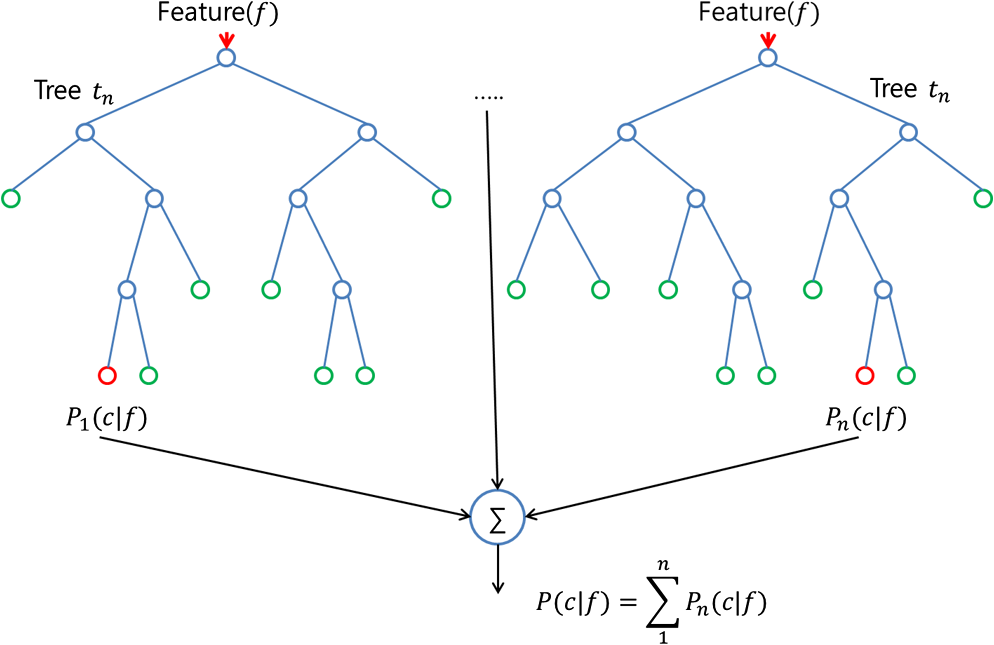

In [ ]:
#from IPython.display import display, Image
#display(Image(filename='./random-forest7 (1).jpg'))

(Source: Analytics Vidhya)

반면 RandomForest 는 앙상블(ensemble) 모델입니다. 

tree 를 생성하여 투표를 통해 결과 값을 예측하는 모델입니다. 

여러개의 tree 가 투표에 참여하기 때문에 하나의 tree 가 오버피팅되어도 전체 모델은 오버피팅을 피할 수 있습니다. 

# Bagging 
RandomForest는 대표적인 Bagging 알고리즘입니다.

Bagging은 Bootstrapping Aggregating의 약자입니다.

부트스트래핑(Bootstrapping)은 복원 추출을 허용한 표본 재추출 방법을 뜻합니다.

부트스트래핑으로 생성된 각각의 샘플들에 별도의 분류기를 학습시켜 얻은 분류 결과들을 종합(Aggregating)하여, 최종 분류 결과를 얻는 방법이 Bagging(Bootstrapping Aggregating)입니다.

RandomForest는 개별 분류기로 DecisionTree를 사용합니다.

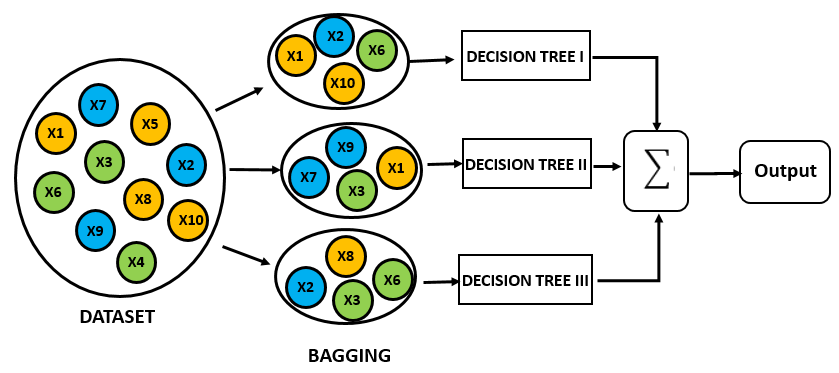

In [ ]:
#from IPython.display import display, Image
#display(Image(filename='./bagging.png'))

(Source: Medium)

각 tree 들은 서로 다른 데이터를 입력 받지만, 모두 training 데이터의 부분집합입니다. 

bagging 또한 오버피팅을 방지하는데 도움을 줍니다. 

# 모델 학습

sklearn 패키지를 이용하면 직접 RandomForest 를 구현하지 않고 모델을 사용할 수 있습니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() #모델을 객체에 할당

clf.fit(train_X,train_y) #모델 학습

RandomForestClassifier()

# 추론 

모델 학습이 완료 되었습니다! 

이제 test 데이터를 예측 해보아요!

In [ ]:
#test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실전캐글/test.csv')
#test.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,1,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,2,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,3,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,4,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,5,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


In [ ]:
#test_X = test.drop(['id'],axis=1)

In [34]:
test_X = test_X.to(DEVICE)
output =model(test_X)

In [35]:
 _, pred = torch.max(output, 1)
 pred

tensor([1, 0, 1,  ..., 0, 0, 3], device='cuda:0')

# dacon 대회에 제출하기
이제 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [36]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실전캐글/sample_submission.csv')
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [37]:
submission['target'] = pred.cpu()

# 데이터가 잘 들어갔는지 확인합니다.
submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,1
9339,9340,1
9340,9341,0
9341,9342,0


In [38]:
submission.to_csv('0310_submit.csv',index=False)